<a href="https://colab.research.google.com/github/ImSumitJadhav/Netflix-Movies-and-TV-Shows-clustering-and-recommendation-system/blob/main/Netflix_Movies_and_TV_Shows_Clustering_and_Recommended_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name-Sumit Vasnat Jadhav**

#<font color='red'> **Project Name-Netflix Movies and TV shows Clustering and Recommendation system**

---

#<font color='blue'> **Problem Statement**

<font color='blue'>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

<font color='blue'>In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

<font color='blue'>Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

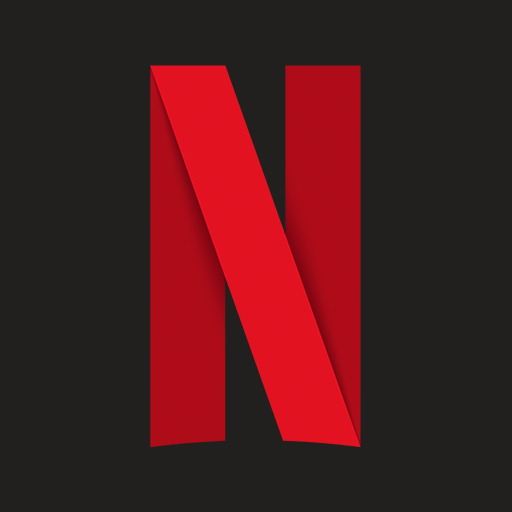

#<font color='red'> **Let's go...**
---

In [ ]:
#import libraries for statastical calculations and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#if version of python is different then this will ignore these warnings
import warnings
warnings.filterwarnings('ignore')

#import drive to google colab
from google.colab import drive

In [ ]:
#import drive
drive.mount('/content/MyDrive') 

#select file path which we have to used and read by pandas  
dataframe=pd.read_csv('/content/MyDrive/MyDrive/AlmaBetter/Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/MyDrive


In [ ]:
#show top 5 values in dataframe
dataframe.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#show bottom 5 values in dataframe
dataframe.tail()      

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
dataframe.shape   #<<<<<<<size of new dataset 

(7787, 12)

#<font color='red'> **Data Summery and Cleaning**

---

In [ ]:
#get information about null values and datatypes
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#count of null values rows in each column
dataframe.isna().sum()     

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Null values are replaced by "Unknown"
dataframe['director'] = dataframe['director']. fillna('Unknown')
dataframe['cast'] = dataframe['cast']. fillna('Unknown')
dataframe['country'] = dataframe['country']. fillna('Unknown')
dataframe['date_added'] = dataframe['date_added']. fillna('Unknown')
dataframe['rating'] = dataframe['rating']. fillna('Unknown')  

In [ ]:
#size of dataset after deleting NaN values
dataframe.shape 

(7787, 12)

In [ ]:
#null values count of each row after replaced by "Unknown"
dataframe.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#Cleaned Dataframe
#dataset after replacing null values
dataframe.head()     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#**Attribute Information**

In [ ]:
#all columns of dataframe 
dataframe.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#<font color='red'> **Data Visualization**

---

<font color='blue'>**1.Percentage of Movies and TV Shows**

In [ ]:
df=dataframe.copy()

In [ ]:
#to get count of movies and TV shows
data=df.groupby("type").size()      
data

type
Movie      5377
TV Show    2410
dtype: int64

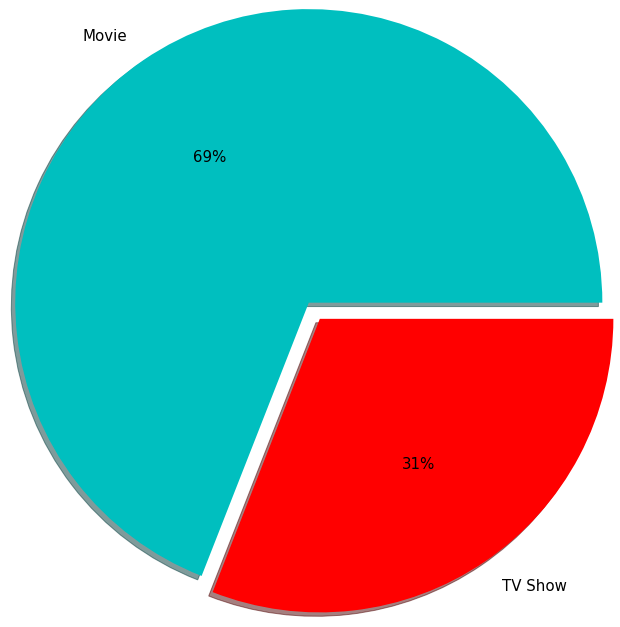

In [ ]:
#Pie plot to show percentage of Movies and TV Shows in overall dataset
plt.figure(figsize=(16,9))
plt.pie(data, labels=['Movie', 'TV Show'], colors=['c','r'],explode=[0, 0.1],textprops ={"fontsize":15} ,radius = 1.5,shadow = True, autopct='%.0f%%')# plotting data on chart
plt.show()

**From given dataset we can clearly find out Movies percentage is more than TV Shows**

In [ ]:
#seperating dataframe of type movie
movie_df= df[df['type'] == 'Movie']
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [ ]:
#seperating dataframe of type Tv show
Tv_show_df= df[df['type'] == 'TV Show']
Tv_show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


<font color='blue'>**2.Count of "movies" with respect to "rating"**

In [ ]:
#to count movies by rating category
rating_count_m=pd.DataFrame(movie_df.groupby("rating").size()).reset_index()

#column names 
rating_count_m.columns=["rating","count"]
rating_count_m                          

,rating,count
0,G,39
1,NC-17,3
2,NR,79
3,PG,247
4,PG-13,386
5,R,663
6,TV-14,1272
7,TV-G,111
8,TV-MA,1845
9,TV-PG,505


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

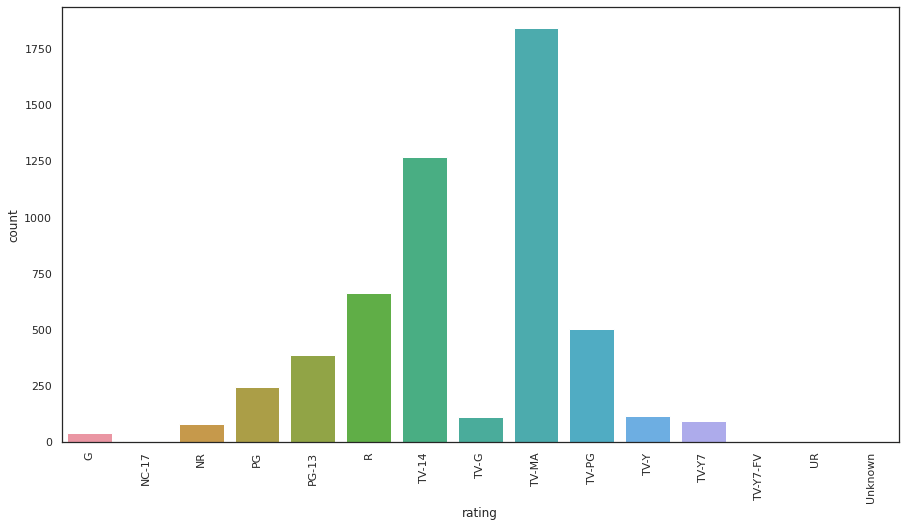

In [ ]:
#plot graph of count movies by 'rating' 
sns.set(rc={'figure.figsize':(15,8)})   #set figure size
sns.set_style("white")  #set style
sns.barplot(x=rating_count_m['rating'],y=rating_count_m['count'],data=rating_count_m)
plt.xticks(rotation="vertical")

**"TV-MA" rating has more number of movies.After that "TV-14" rating category has more number of movies**

<font color='blue'>**3.Count of "TV Shows" with respect to "rating"**

In [ ]:
#to count TV Shows by rating categories
rating_count_s=pd.DataFrame(Tv_show_df.groupby("rating").size()).reset_index()

#column names
rating_count_s.columns=["rating","count"]
rating_count_s  

,rating,count
0,NR,5
1,R,2
2,TV-14,659
3,TV-G,83
4,TV-MA,1018
5,TV-PG,301
6,TV-Y,163
7,TV-Y7,176
8,TV-Y7-FV,1
9,Unknown,2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

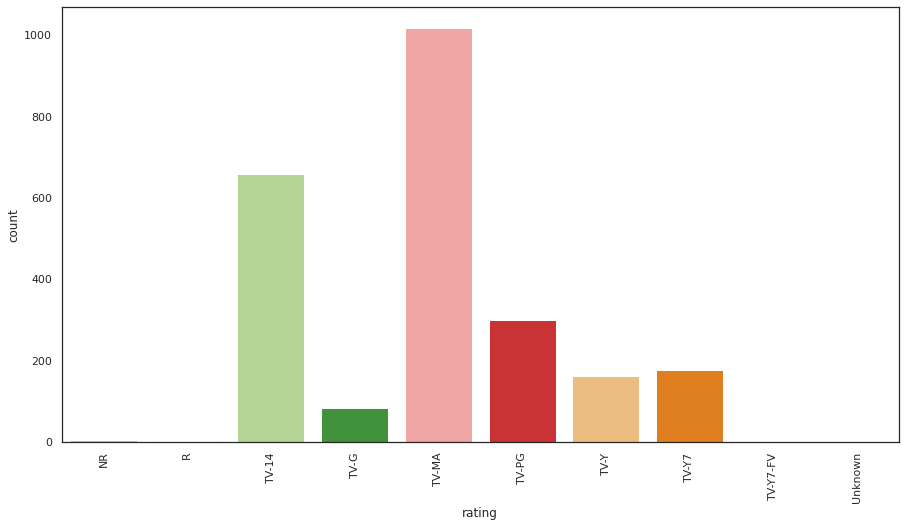

In [ ]:
#plot graph of count of TV shows by'rating'
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
palette = sns.color_palette("Paired", 9)    #set colour type which is "Paired"
sns.barplot(x=rating_count_s['rating'],y=rating_count_s['count'],data=rating_count_s,palette=palette)
plt.xticks(rotation="vertical") #set position of xticks values

**"TV-MA" rating has more number of TV shows.After that "TV-14" rating category has more number of TV shows**

<font color='blue'>**4.Penetration of movies in last 20 years**



In [ ]:
#change in movies release count by last 20 years
year_m=pd.DataFrame(movie_df.groupby("release_year").size()).reset_index()
year_m.columns=["year","count_in_year"]
year_m["year"]=year_m["year"].astype(int)

#get last 20 years(i.e. 2000 to 2021)
year_m=year_m.loc[year_m["year"]>= 2000]
year_m

,year,count_in_year
50,2000,30
51,2001,32
52,2002,39
53,2003,40
54,2004,50
55,2005,61
56,2006,72
57,2007,72
58,2008,102
59,2009,103


Text(0, 0.5, 'count of movies in that year')

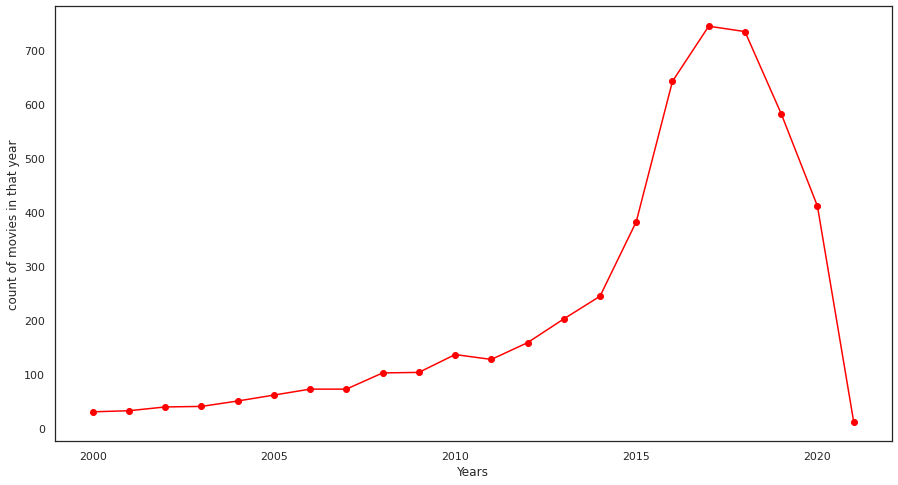

In [ ]:
#change in count by each year shown by line plot
plt.plot(year_m["year"], year_m["count_in_year"],color="red",marker="o")   
plt.xlabel("Years")
plt.ylabel("count of movies in that year")

**Between year 2015 to 2020 have high penetration on Movies**

<font color='blue'>**5.Penetration of TV shows in last 20 years**

In [ ]:
#change in TV Shows release count by last 20 years
year_tv=pd.DataFrame(Tv_show_df.groupby("release_year").size()).reset_index()
year_tv.columns=["year","count_in_year"]
year_tv["year"]=year_tv["year"].astype(int)

#get last 20 years(i.e. 2000 to 2021)
year_tv=year_tv.loc[year_tv["year"]>= 2000]
year_tv

,year,count_in_year
24,2000,4
25,2001,4
26,2002,6
27,2003,9
28,2004,9
29,2005,12
30,2006,13
31,2007,13
32,2008,23
33,2009,34


Text(0, 0.5, 'count of TV shows in that year')

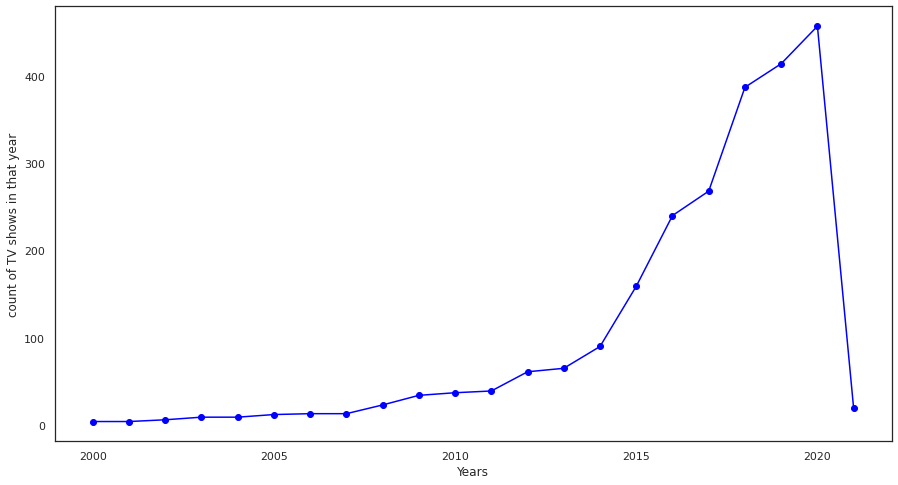

In [ ]:
#line plot to show penetration of movies
plt.plot(year_tv["year"], year_tv["count_in_year"],color="blue",marker="o") 
plt.xlabel("Years")
plt.ylabel("count of TV shows in that year")

**Between year 2016 to 2020 have high penetration on TV shows**

<font color='blue'>**6.To find top 10 countries which release most number of Movies**

In [ ]:
#movies count by country
movie_count=pd.DataFrame(movie_df.groupby("country").size()).reset_index()
movie_count.columns=["country","movie_count"]
movie_count

,country,movie_count
0,Argentina,34
1,"Argentina, Brazil, France, Poland, Germany, De...",1
2,"Argentina, Chile",1
3,"Argentina, Chile, Peru",1
4,"Argentina, France",1
...,...,...
586,Venezuela,1
587,"Venezuela, Colombia",1
588,Vietnam,5
589,West Germany,1


In [ ]:
 #To get top 10 countries
top_ten_countries=movie_count.nlargest(10,"movie_count")  
top_ten_countries

,country,movie_count
475,United States,1850
195,India,852
579,Unknown,230
399,United Kingdom,193
44,Canada,118
115,Egypt,89
346,Spain,89
387,Turkey,73
299,Philippines,70
122,France,69


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

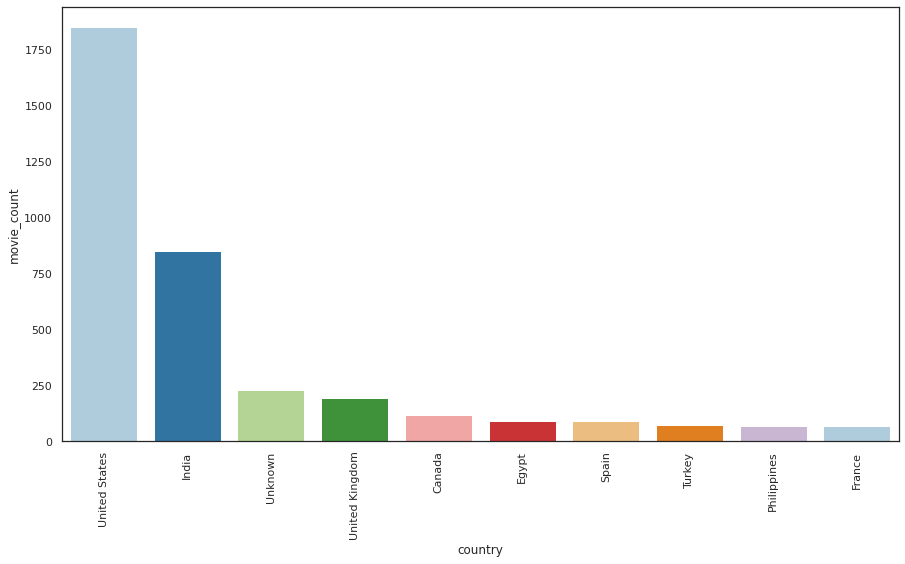

In [ ]:
#plot graph of count movies 'country' 
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
palette = sns.color_palette("Paired", 9)
sns.barplot(x=top_ten_countries['country'],y=top_ten_countries['movie_count'],data=top_ten_countries,palette=palette)
plt.xticks(rotation="vertical")

**"United States" released highest number of Movies with respect to other countries.**

<font color='blue'>**7.To find top 10 countries which release most number of TV Shows**

In [ ]:
#TV shows by country
tvshow_count=pd.DataFrame(Tv_show_df.groupby("country").size()).reset_index()
tvshow_count.columns=["country","movie_count"]
tvshow_count

,country,movie_count
0,Argentina,16
1,"Argentina, Spain",1
2,"Argentina, United States, Mexico",1
3,Australia,46
4,"Australia, Canada",1
...,...,...
179,"United States, Sweden",1
180,"United States, United Kingdom",7
181,"United States, United Kingdom, Australia",1
182,Unknown,277


In [ ]:
#To get top 10 countries
top_ten_countries_tv=tvshow_count.nlargest(10,"movie_count")   
top_ten_countries_tv

,country,movie_count
151,United States,705
182,Unknown,277
132,United Kingdom,204
77,Japan,157
112,South Korea,147
63,India,71
124,Taiwan,68
14,Canada,59
3,Australia,46
44,France,46


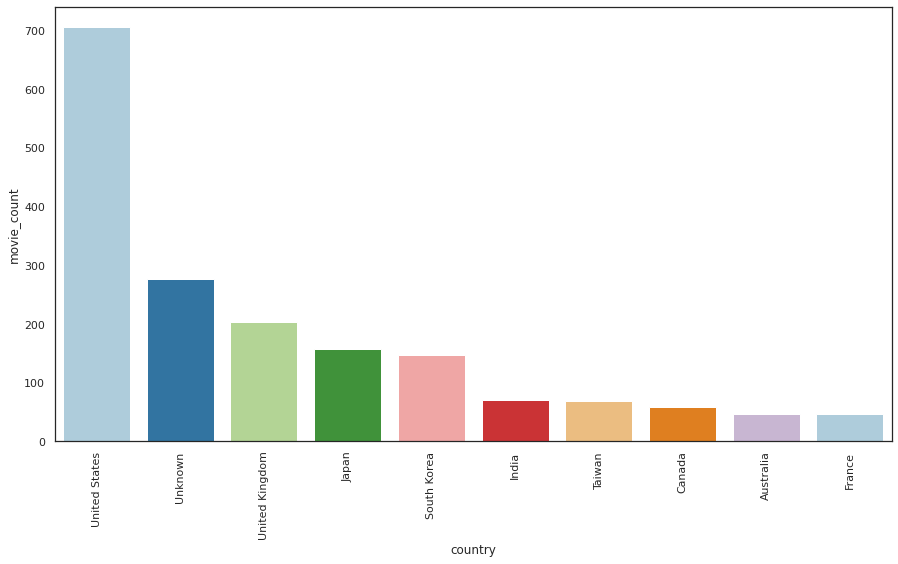

In [ ]:
#plot graph of count TV shows 'country' 
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
palette = sns.color_palette("Paired", 9)
sns.barplot(x=top_ten_countries_tv['country'],y=top_ten_countries_tv['movie_count'],data=top_ten_countries_tv,palette=palette)
plt.xticks(rotation="vertical")
  
plt.show()

**Also "United States" released highest number of TV shows with respect to other countries.**

<font color='blue'>**8.To find which director have more number of movies or TV shows.**

In [ ]:
#find top 5 directors

director_df=df['director'].value_counts().reset_index()
director_df.rename(columns={'index': 'director name'}, inplace=True)
director_df.rename(columns={'director': 'Count'}, inplace=True)
director_df=director_df[1:]
director_df.head()

,director name,Count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12


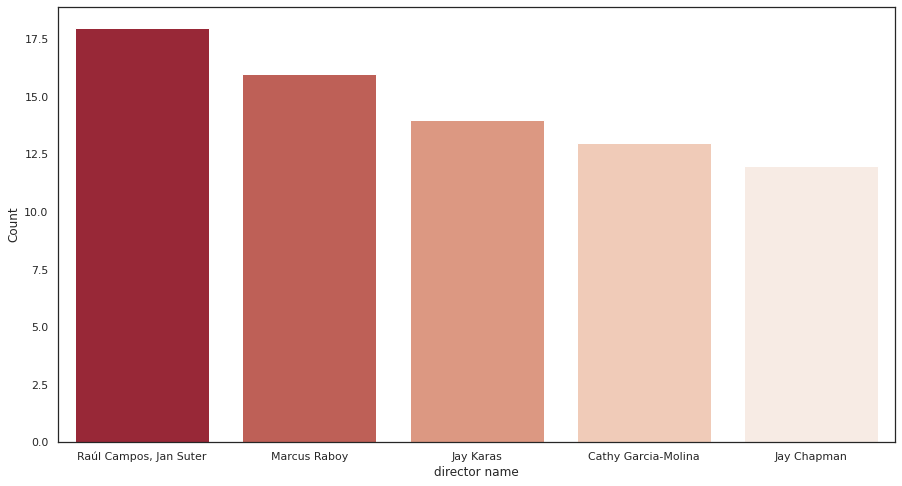

In [ ]:
#to show most number of movies and tv shows made by which director
palette = sns.color_palette("RdBu", 10)
sns.barplot(x="director name",y="Count",data=director_df.head(),palette=palette)

**Raul Campos,Jan Suter,Marcus Raboy,Jay Karas,Cathy Garcia-Molina and Jay Chapman this is some popular directors all over the world**

In [ ]:
#find names of directors which have less number movies directed
director_df.tail()

,director name,Count
4045,Andrew C. Erin,1
4046,Vibhu Virender Puri,1
4047,Lucien Jean-Baptiste,1
4048,Jason Krawczyk,1
4049,Sam Dunn,1


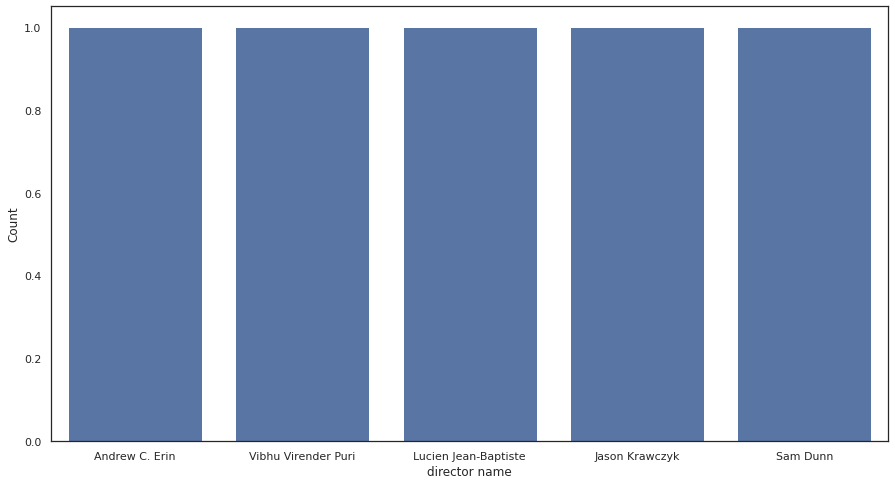

In [ ]:
#to show less number of movies and tv shows made by which director(bottom five directors made 1 movie each)
sns.barplot(x="director name",y="Count",data=director_df.tail(),color="b")

**These directors have lowest number of movies that is "1"** 

#<font color='red'> **Clustering Algoritham**

---

In [ ]:
#form new dataframe which is used for clustering
df_cluster=df.copy()

#drop columns which are less important
df_cluster=df_cluster.drop(["show_id","date_added","description","title","duration","director","cast","country","release_year"],axis=1)
df_cluster

,type,rating,listed_in
0,TV Show,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,TV-MA,"Dramas, International Movies"
2,Movie,R,"Horror Movies, International Movies"
3,Movie,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,PG-13,Dramas
...,...,...,...
7782,Movie,TV-MA,"Dramas, International Movies"
7783,Movie,TV-14,"Dramas, International Movies, Music & Musicals"
7784,Movie,TV-MA,"Documentaries, International Movies, Music & M..."
7785,TV Show,TV-PG,"International TV Shows, Reality TV"


In [ ]:
#import libraries which used for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Change listed_in column from type str to lists
df_cluster["listed_in"] = df_cluster["listed_in"].str.split(', ').tolist()

# 1.Encoding

In [ ]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
encoded_df = df_cluster.join(pd.DataFrame(mlb.fit_transform(df_cluster.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=df_cluster.index))

In [ ]:
#get dummies for column type and rating
encoded_df=pd.get_dummies(encoded_df,columns=["type","rating"])

In [ ]:
encoded_df

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,rating_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#import KMeans clustering algorithm
from sklearn.cluster import KMeans

# 2.Elbow Method

In [ ]:
#Elbow method:To find optimum value of k
inertias = []

#k ranges from 1 to 10
K = range(1, 20)

#for loop to find for which value we get error value is less
for k in K:
	kmeanModel = KMeans(n_clusters=k).fit(encoded_df)
	kmeanModel.fit(encoded_df)

  #calculate inertia value for each value of k and add to "inerias" list
	inertias.append(kmeanModel.inertia_)

In [ ]:
#value of inertia for each value of k
inertias

[24101.004751508903,
 18961.16676199605,
 17384.045900127963,
 16135.649467079427,
 15346.801655514315,
 14543.28819508676,
 13968.055202035928,
 13347.790296361482,
 12809.24564290896,
 12252.627308557936,
 11866.3303130627,
 11606.238871178297,
 11240.997450961519,
 11117.008900905203,
 10723.534311068666,
 10537.295806251568,
 10324.26293608201,
 10048.218881278044,
 9874.70718900682]

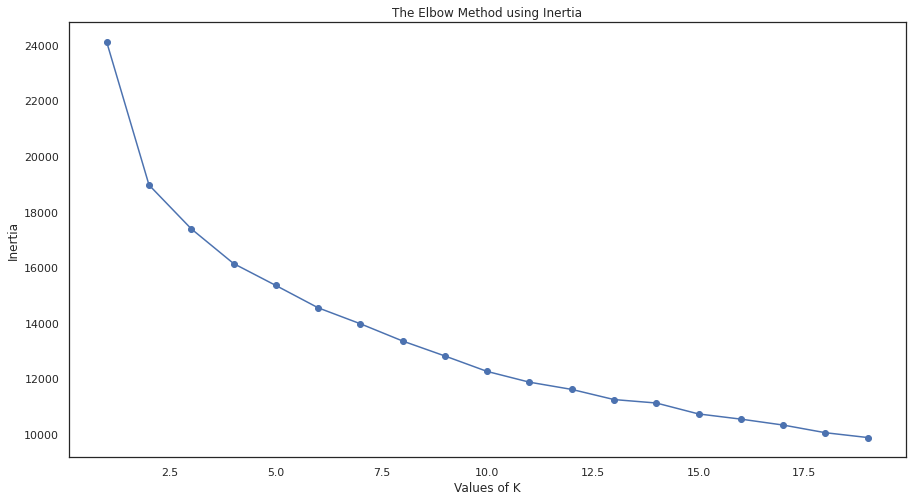

In [ ]:
#plot graph inertia vs value of k(number of clusters)
plt.plot(K, inertias,marker="o")
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# 3.KMeans Clustering

In [ ]:
# Fit the cluster
km = KMeans(n_clusters = 18,verbose=2,max_iter=100,random_state=10)
predicted_clusters=km.fit_predict(encoded_df)
predicted_clusters

Initialization complete
Iteration 0, inertia 15334.0
Iteration 1, inertia 11173.098608092274
Iteration 2, inertia 10956.070132636682
Iteration 3, inertia 10883.127948376772
Iteration 4, inertia 10752.37387548408
Iteration 5, inertia 10622.39876407768
Iteration 6, inertia 10582.619867827047
Iteration 7, inertia 10579.699774744618
Iteration 8, inertia 10571.643468672726
Iteration 9, inertia 10558.356605041543
Iteration 10, inertia 10549.5670502692
Iteration 11, inertia 10545.00034812425
Iteration 12, inertia 10539.911458979586
Iteration 13, inertia 10521.131662689004
Iteration 14, inertia 10513.784382340618
Iteration 15, inertia 10507.359465824149
Iteration 16, inertia 10506.932251820263
Iteration 17, inertia 10501.647211551803
Iteration 18, inertia 10496.729407192966
Iteration 19, inertia 10495.7202063162
Iteration 20, inertia 10487.806675232303
Iteration 21, inertia 10481.815706384321
Iteration 22, inertia 10480.543738172144
Iteration 23, inertia 10479.76397631115
Iteration 24, inertia

array([ 1,  3,  8, ..., 17, 12, 17], dtype=int32)

In [ ]:
#value predicted by cluster insert into dataframe
cluster_df=df[['title','type',"rating"]]
cluster_dict=[]
for i in predicted_clusters:
  cluster_dict.append(i)

cluster_df["cluster_number"]=cluster_dict
cluster_df

,title,type,rating,cluster_number
0,3%,TV Show,TV-MA,1
1,7:19,Movie,TV-MA,3
2,23:59,Movie,R,8
3,9,Movie,PG-13,2
4,21,Movie,PG-13,0
...,...,...,...,...
7782,Zozo,Movie,TV-MA,3
7783,Zubaan,Movie,TV-14,5
7784,Zulu Man in Japan,Movie,TV-MA,17
7785,Zumbo's Just Desserts,TV Show,TV-PG,12


In [ ]:
#count of movies and tv shows in cluster 
cluster_data=pd.DataFrame(cluster_df["cluster_number"].value_counts())
cluster_data

,cluster_number
5,986
3,728
8,521
10,496
11,475
9,457
7,440
2,437
6,415
4,378


([<matplotlib.patches.Wedge at 0x7f22cb4ac610>,
 [Text(1.5211653323449943, 0.6391838793897602, '5'),
  Text(0.764139558214184, 1.4623921278413092, '3'),
  Text(-0.03694199035739962, 1.6495863994797104, '8'),
  Text(-0.6918689785971065, 1.4979376877744273, '10'),
  Text(-1.2113666277013466, 1.1203083920472379, '11'),
  Text(-1.5381260837309603, 0.5972170045690761, '9'),
  Text(-1.649940782660741, 0.013979045491789596, '7'),
  Text(-1.5525817503700534, -0.5585605682626205, '2'),
  Text(-1.2735250998054988, -1.0491109665642593, '6'),
  Text(-0.8789597903055049, -1.396398828066718, '4'),
  Text(-0.4216370659341607, -1.5952185382042274, '14'),
  Text(0.052912310919758065, -1.6491513840012175, '12'),
  Text(0.48563422464375666, -1.5769145188800369, '15'),
  Text(0.8648313082331556, -1.405192801112975, '16'),
  Text(1.1820395464030837, -1.1512091516050387, '0'),
  Text(1.4191354661330986, -0.8417568109395925, '17'),
  Text(1.57061577110179, -0.5056343536255522, '1'),
  Text(1.6414799946259013

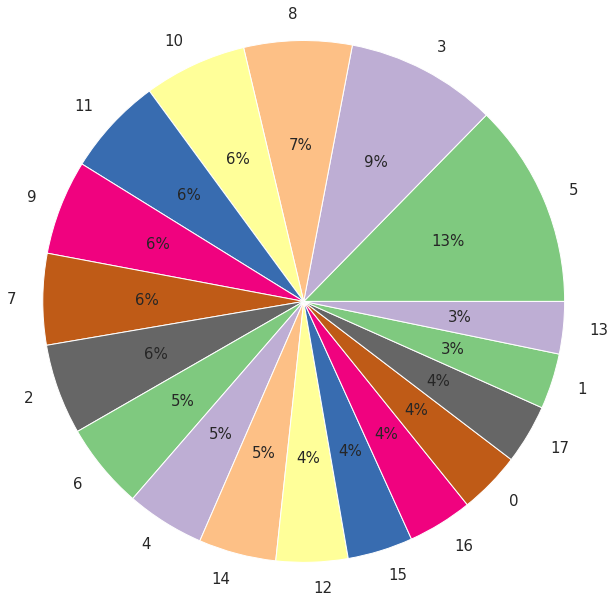

In [ ]:
#get index of each value in above dataframe for graph
indx=cluster_data.index
col = sns.color_palette("Accent", 18)
plt.pie(cluster_data,labels=indx,textprops ={"fontsize":15} ,autopct='%.0f%%',radius =1.5,shadow = False,colors=col)

# 4.Clustering Plot

In [ ]:
encoded_df    #encoded dataframe

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,rating_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Dimensionality reduction method

In [ ]:
# variable reduction
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(encoded_df)

x_embedded.shape

(7787, 2)

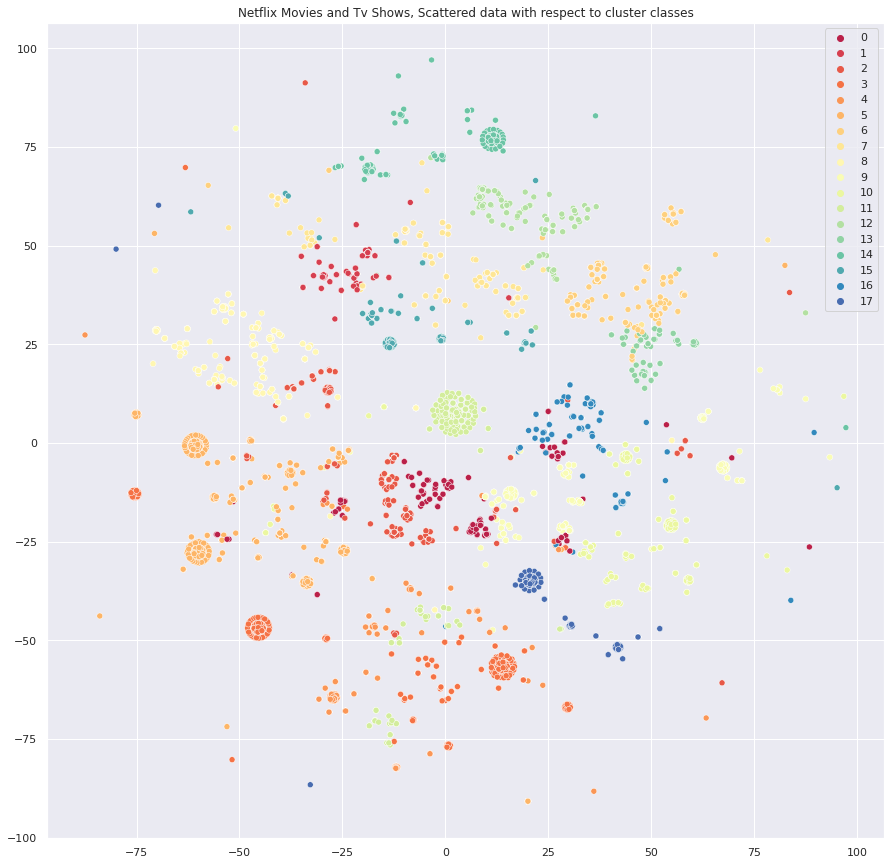

In [ ]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("Spectral", len(set(predicted_clusters)))

# plot
sns.scatterplot(x_embedded[:,0], x_embedded[:,1],hue=predicted_clusters, legend='full', palette=palette)
plt.title("Netflix Movies and Tv Shows, Scattered data with respect to cluster classes")
plt.show()

#<font color='red'> **Recommendation System**
---

<font color='blue'> Generally movies and TV Shows recommended by means of their tags which consist of Genere.So we use "listed_in" column as well as we used "type","release_year" and "rating" 

In [ ]:
#for recommendation we use "dff" dataframe which is copy of "df" data frame
dff=df.copy()

#sorting of usefull features
dff=dff.drop(["description","date_added","duration","show_id","director","cast","country"],axis=1)    

#change data type of release year to string
dff["release_year"]=dff["release_year"].astype("str")

In [ ]:
#To find out number of rows which contains duplicate values
dff.duplicated().sum()

0

#<font color='blue'> **Natural Language Processing**

In [ ]:
#"Spaces" removed between words and saperated by ","

dff["type"]=dff["type"].str.replace(" ",'')
dff["release_year"]=dff["release_year"].str.replace(" ",'')
dff["rating"]=dff["rating"].str.replace(" ",'')
dff["listed_in"]=dff["listed_in"].str.replace(" ",'')

In [ ]:
dff   #<====Dataframe after removing spaces between words

,type,title,release_year,rating,listed_in
0,TVShow,3%,2020,TV-MA,"InternationalTVShows,TVDramas,TVSci-Fi&Fantasy"
1,Movie,7:19,2016,TV-MA,"Dramas,InternationalMovies"
2,Movie,23:59,2011,R,"HorrorMovies,InternationalMovies"
3,Movie,9,2009,PG-13,"Action&Adventure,IndependentMovies,Sci-Fi&Fantasy"
4,Movie,21,2008,PG-13,Dramas
...,...,...,...,...,...
7782,Movie,Zozo,2005,TV-MA,"Dramas,InternationalMovies"
7783,Movie,Zubaan,2015,TV-14,"Dramas,InternationalMovies,Music&Musicals"
7784,Movie,Zulu Man in Japan,2019,TV-MA,"Documentaries,InternationalMovies,Music&Musicals"
7785,TVShow,Zumbo's Just Desserts,2019,TV-PG,"InternationalTVShows,RealityTV"


In [ ]:
 #merge all new columns in one column called "tags"
dff["tags"]=dff["type"]+","+dff["release_year"]+","+dff["rating"]+","+dff["listed_in"]
dff.head(5)

,type,title,release_year,rating,listed_in,tags
0,TVShow,3%,2020,TV-MA,"InternationalTVShows,TVDramas,TVSci-Fi&Fantasy","TVShow,2020,TV-MA,InternationalTVShows,TVDrama..."
1,Movie,7:19,2016,TV-MA,"Dramas,InternationalMovies","Movie,2016,TV-MA,Dramas,InternationalMovies"
2,Movie,23:59,2011,R,"HorrorMovies,InternationalMovies","Movie,2011,R,HorrorMovies,InternationalMovies"
3,Movie,9,2009,PG-13,"Action&Adventure,IndependentMovies,Sci-Fi&Fantasy","Movie,2009,PG-13,Action&Adventure,IndependentM..."
4,Movie,21,2008,PG-13,Dramas,"Movie,2008,PG-13,Dramas"


In [ ]:
import nltk
from nltk.corpus import stopwords

#download all stopword in pakage
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Save all stopwords in English Language
stops = set(stopwords.words('english'))
print(stops)

{'has', 'against', 'a', 'during', 'to', 'more', 'before', 'she', 'him', 'an', 'been', 'and', 'your', 'most', 'didn', "it's", 'doing', 'how', 's', 'shouldn', 'having', 'had', 'yours', 'haven', "you'll", 'did', 'where', 'is', 'same', "she's", 'd', 'ours', 'yourselves', 'himself', 'that', 'whom', 'than', 'hasn', "you've", 'mustn', 'these', 'in', 'which', 'through', 'or', 'it', 'our', 'so', 'this', 'only', "needn't", 'shan', 're', 'me', "doesn't", 'wouldn', 'being', 'ma', 'over', 'have', 'why', 'them', 'but', 'of', 'very', 'we', "wouldn't", 'what', "you're", 'are', 'each', 'once', 'couldn', "mustn't", 'under', "hadn't", 'below', 'own', 'if', 've', "wasn't", 'he', 'by', 'there', "you'd", 'when', 'such', "hasn't", "should've", 'm', 'both', 'do', "don't", 'll', 'its', 'any', "weren't", 'while', 'their', 'am', 'herself', 'her', 'all', 'too', 'no', 'isn', 'down', "haven't", 'does', 'hadn', 'ourselves', 'those', 'yourself', 'for', 'they', 'on', 'again', 'mightn', 'o', 'wasn', 'don', 'be', 'their

In [ ]:
print("Number of stopwords: ", len(stops))  #count of stopwords

Number of stopwords:  179


In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stops]
    # joining the list of words with space separator
    return " ".join(text)

#apply stopward function on tags
dff['tags']=dff['tags'].apply(stopwords)

In [ ]:
#Remove puncuations
dff['tags'].str.replace('[^\w\s]','')
dff.head()

,type,title,release_year,rating,listed_in,tags
0,TVShow,3%,2020,TV-MA,"InternationalTVShows,TVDramas,TVSci-Fi&Fantasy","tvshow,2020,tv-ma,internationaltvshows,tvdrama..."
1,Movie,7:19,2016,TV-MA,"Dramas,InternationalMovies","movie,2016,tv-ma,dramas,internationalmovies"
2,Movie,23:59,2011,R,"HorrorMovies,InternationalMovies","movie,2011,r,horrormovies,internationalmovies"
3,Movie,9,2009,PG-13,"Action&Adventure,IndependentMovies,Sci-Fi&Fantasy","movie,2009,pg-13,action&adventure,independentm..."
4,Movie,21,2008,PG-13,Dramas,"movie,2008,pg-13,dramas"


In [ ]:
# Stemming of words
from nltk.stem import PorterStemmer

ps=PorterStemmer()

def stem(text):   #User define function for stemming
   Y=[]
   for i in text.split():
      Y.append(ps.stem(i)) 

   return " ".join(Y)


dff['tags']=dff['tags'].apply(stem)

In [ ]:
#replace some values from tags column  
dff["tags"]=dff["tags"].str.replace(".",'')
dff["tags"]=dff["tags"].str.replace("unknown",'')
dff.head()

,type,title,release_year,rating,listed_in,tags
0,TVShow,3%,2020,TV-MA,"InternationalTVShows,TVDramas,TVSci-Fi&Fantasy","tvshow,2020,tv-ma,internationaltvshows,tvdrama..."
1,Movie,7:19,2016,TV-MA,"Dramas,InternationalMovies","movie,2016,tv-ma,dramas,internationalmovi"
2,Movie,23:59,2011,R,"HorrorMovies,InternationalMovies","movie,2011,r,horrormovies,internationalmovi"
3,Movie,9,2009,PG-13,"Action&Adventure,IndependentMovies,Sci-Fi&Fantasy","movie,2009,pg-13,action&adventure,independentm..."
4,Movie,21,2008,PG-13,Dramas,"movie,2008,pg-13,drama"


#<font color='blue'> **CountVectorizer Algoritham**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Text to vector value

cv=CountVectorizer(max_features=5000) 
vector=cv.fit_transform(dff["tags"].values).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#IMP features
imp_features=cv.get_feature_names()

#top 100 features
imp_features[0:100]    

['13',
 '14',
 '17',
 '1925',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1954',
 '1955',
 '1956',
 '1958',
 '1959',
 '1960',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 'action',
 'adventur',
 'adventure',
 'animefeatur',
 'animefeatures',
 'animeseri',
 'animeseries',
 'britishtvshows',
 'children',
 'classic',
 'classicmovi',
 'classicmovies',
 'comedi',
 'comedies',
 'crimetvshow',
 'crimetvshows',
 'cultmovi',
 'cultmovies',
 'culttv',
 'documentari',
 'documentaries',
 'docuseri',

#<font color='blue'>  **"cosine_similarity" Algoritham**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity    

#used to find similar vectors
sim=cosine_similarity(vector)

#shape of similarity matrics
sim.shape

(7787, 7787)

In [ ]:
#similarity of movies and tv shows by cosine values and index
movies_list=sorted(list(enumerate(sim[0])),reverse=True,key=lambda x:x[1])[1:6]
movies_list

[(931, 0.9999999999999997),
 (4611, 0.9999999999999997),
 (6634, 0.9428090415820634),
 (2593, 0.8888888888888886),
 (2899, 0.8888888888888886)]

In [ ]:
#<====== recommendation of movies which is related to your given movie ========>

def recommend_movies(movie):
  index=dff[dff["title"]==movie].index[0]
  dist=sim[index]
  movies_list=sorted(list(enumerate(dist)),reverse=True,key=lambda x:x[1])[1:6]

  for i in movies_list:
    print("*",df.iloc[i[0]].title," : ",df.iloc[i[0]].description)
    print("Cast-",df.iloc[i[0]].cast)
    print("Director-",df.iloc[i[0]].director)
    print("Date-",df.iloc[i[0]].date_added)
    print()

In [ ]:
recommend_movies("7:19")   #<===== To Show recommended movies or TV show 

* 7 años  :  Loyalties are tested and cruelties revealed when four business partners spend a tense evening debating who will pay for the crime they committed.
Cast- Paco León, Juana Acosta, Juan Pablo Raba, Alex Brendemühl, Manuel Morón
Director- Roger Gual
Date- October 27, 2016

* Belgica  :  Two brothers become partners in a modest nightclub and turn it into the hottest spot in town, but their exhilarating run of success comes at a price.
Cast- Stef Aerts, Tom Vermeir, Charlotte Vandermeersch, Hélène Devos, Boris Van Severen, Sara De Bosschere, Dominique Van Malder, Sam Louwyck, Stefaan De Winter, Silvanus Saow
Director- Felix Van Groeningen, Felix van Groeningen
Date- April 15, 2016

* Cardboard Gangsters  :  A low-level drug dealer decides to move up the ranks of the illegal narcotics trade in Darndale, Dublin, putting him and his gang on a violent path.
Cast- John Connors, Fionn Walton, Kierston Wareing, Paul Alwright, Ryan Lincoln, Jimmy Smallhorne, Toni O'Rourke, Fionna Hewitt-

**---> Recommendation System is made up with using Tags.Movies or TV show will recommended by means of similar tags.**

#<font color='blue'> **TAGS OF MOVIE....**

**TO CHECK ACCURACY OF THE MODEL ,YOU CAN COMPARE TAGS OF MOVIE THAT YOU ENTERED AND RECOMMENDATIONS OF MOVIES....**

In [ ]:
def movie1(name_of_movie1):
  Tags_of_movie=list(dff.loc[dff.title ==name_of_movie1,'tags'])
  return Tags_of_movie 

In [ ]:
#tags of movie which you watched 

movie1('7:19') #<<<<<<<<<<<<<<<<<<<<<< from here you can change name of the movie or TV show

['movie,2016,tv-ma,dramas,internationalmovi']

#<font color='blue'> **TAGS OF RECOMMENDED MOVIED**

In [ ]:
def movie2(name_of_movie2):
  Tags_reco_movie=list(dff.loc[dff.title ==name_of_movie2, 'tags'])
  return Tags_reco_movie

In [ ]:
#tags of movies which is recommended

movie2("Belgica")   #<<<<<<<<<<<<<<<<<<<<<< from here you can change name of the movie or TV show

['movie,2016,tv-ma,dramas,internationalmovi']

#<font color='red'>  **Conclusion**
---

**A)Basis of visualization**

We find out summery of dataset with various columns.

1.Percentage of Movies and TV Shows

-Movies(69%)

-TV Shows(31%)

2.Count by rating categories

-Movies(TV-MA)

-TV Shows(TV-MA)

3.Count of Movies and TV Shows by top 10 countries

-Movies(United States)

-TV Shows(United States)

4.Penetration by years

-Movies(2015-2020)

-TV Shows(2016-2020)

5.Top and bottom directors 


**B)KMeans Clustering**

1.Used elbow method to find value of k i.e. number of clusters

-18 clusters

2.Fit data on KMeans clustering algorithm

**C)Recommened top 5 movies gives by user defind function.**

1.Used NLP

-Removing stopwords

-Removing punctuations

-Stemming

2.CountVectorizer 

3.cosine_similarity  

**D)To check accuracy we can compare tags of movies.**



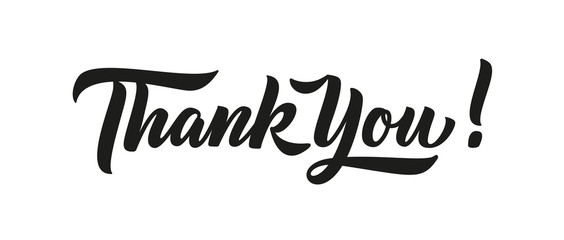